In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('census-income .csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Observations: 
    
# 1. workclass,  education ,marital-status, occupation ,relationship ,race, sex,native-country are all object columns
# 2. There are no null values in the dataset
# 3. Age, Fnlwgt, eductaion-num, capital-gain, capital-loss , hours-per-week are all integer columns
# 4. No float values
# 5. On carefull consideration of the raw data, there are some values that have a special character ? 
# 6. We will need to replace the special character


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


# EXPLORATORY DATA ANALYSIS

In [8]:
# Checking for special characters - ?

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}: {unique_values}')
    print()

Unique values for age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values for fnlwgt: [ 77516  83311 215646 ...  34066  84661 257302]

Unique values for education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-sp

In [9]:
# Counting the number of '?' in the dataset

df[df == '?'].count()



age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [10]:
# Checking for percentage of null values

round(df.isnull().sum() / len(df) *100,  2)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
annual_income     0.0
dtype: float64

In [11]:
# Replace the special character by nan

df = df.replace('?', np.nan)

In [12]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
# Checking for null values

df.isnull().sum()

# Successfully converted all the special characters into null 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [14]:
# # OBSERVATIONS

# 1. We can observe null values in workclass (1836), occupation(1843) and native-country(583) column
# 2. All three are object data types
# 3. We can therefore handle the object data type column null values with MODE

In [15]:
# REPLACING NULL VALUES WITH MODE

# Creating a list of the columns with null values

cols = ['workclass','occupation', 'native-country']

# Filling the null values with mode and using the first mode by iloc[0] as there could be multiple modes

df[cols]=df[cols].fillna(df.mode().iloc[0])

In [16]:
# Checking for the null values again to confirm the replacement

df.isnull().sum()

# OBSERVATIONS:
    
# All null values have been replaced with the mode

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [17]:
# CHECKING FOR DUPLICATES

df.duplicated().sum()

# OBSERVATIONS:
    
# 1. 24 duplicate values have been found in the dataframe
# 2. Since the number of duplicates are 0.0737% we can drop the duplicates

24

In [18]:
# Finding the percent of duplicates

# Formula : (Number of duplicates/Total number of rows)*100

(24/32561)*100

0.07370780995669667

In [19]:
# Dropping duplicates

df.drop_duplicates(keep = "first", inplace = True)

In [20]:
# CHECKING FOR DUPLICATES

df.duplicated().sum()

# OBSERVATIONS:
    
# 1. 24 duplicate values have been found in the dataframe
# 2. Since the number of duplicates are 0.0737% we can drop the duplicates

0

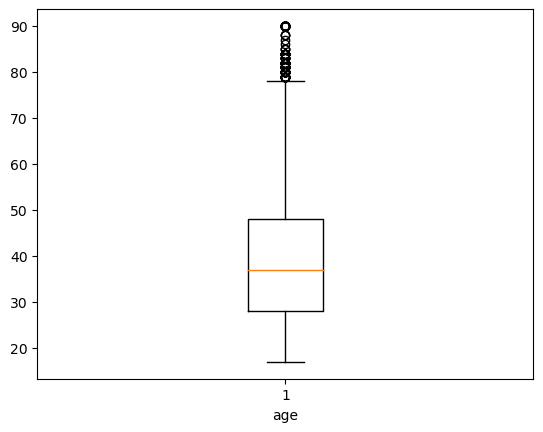

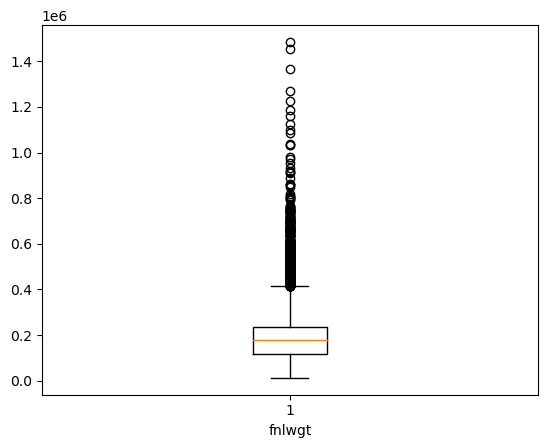

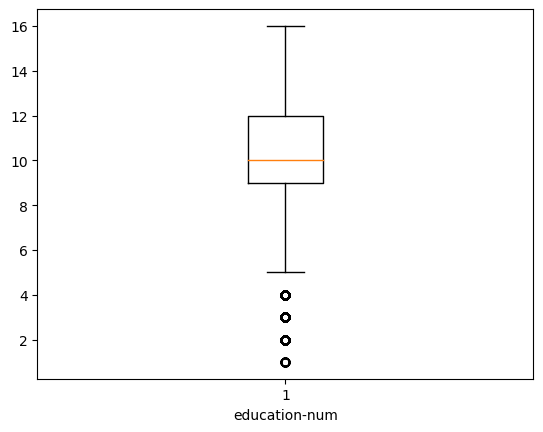

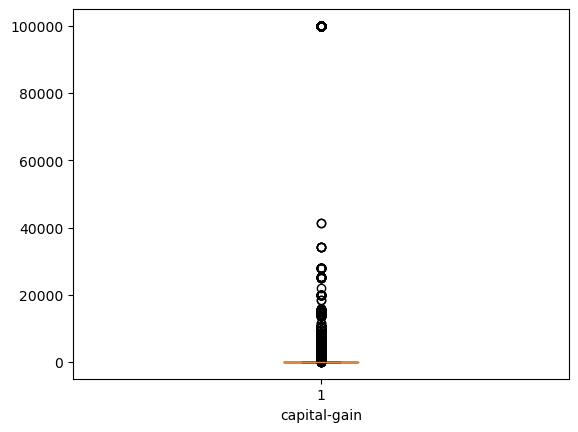

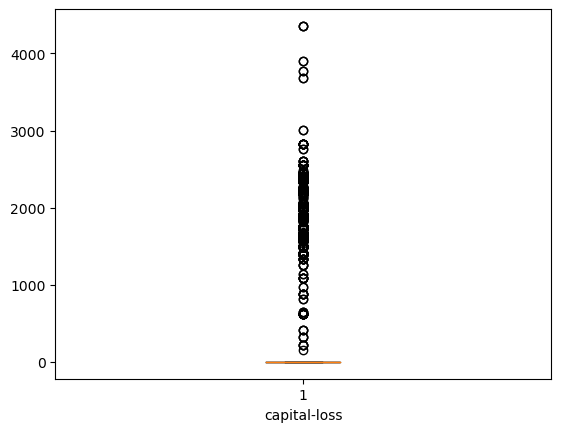

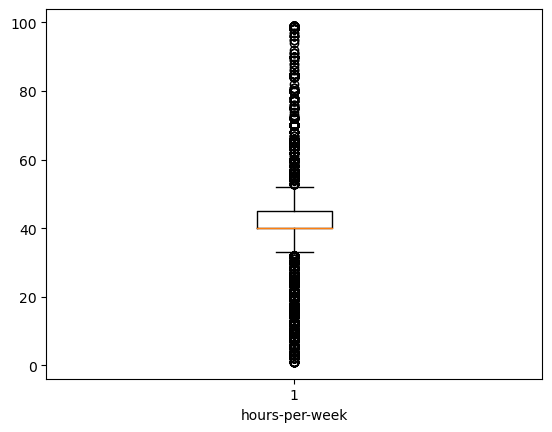

In [21]:
# CHECKING FOR OUTLIERS

for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()


In [22]:
# OBSERVATIONS:
    
#     1. There are a lot of outliers in the numerical columns
#     2. Its important to visualise the columns first to understand the importance of features 
#        and then decide if the outliers can be retained or dropped

# DATA VISUALISATION

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  annual_income   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [24]:
# SEPARATION OF NUMERIC AND CATEGORICAL FEATURE COLUMNS

num_features = []

for i in df.columns:
    if df[i].dtype != 'object':
        num_features.append(i)
        
num_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [25]:
cat_features = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_features.append(i)
        
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'annual_income']

In [26]:
# Bar plot of the target variable

df2 =pd.DataFrame(df['annual_income'].value_counts())
df2

,annual_income
<=50K,24698
>50K,7839


In [27]:
df2.reset_index(inplace = True)
df2

,index,annual_income
0,<=50K,24698
1,>50K,7839


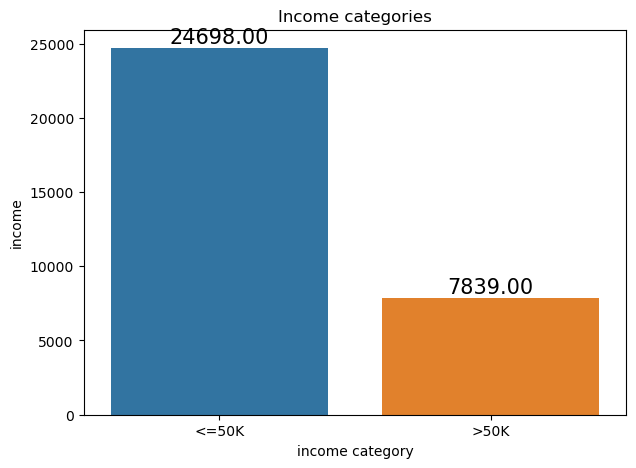

In [28]:
plt.figure(figsize=(7,5))
plots = sns.barplot(df2, x = 'index', y="annual_income")
plt.xlabel ('income category')
plt.ylabel('income')
plt.title("Income categories")
for p in plots.patches:
    plots.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                    p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

# INFERENCE:
    
## 1. 75% of the population has income of less than or equal to 50K
## 2. only 25% has income over 50K

In [29]:
# # Reformat Column We Are Predicting
df2 = df.copy()


df2['annual_income']=df2['annual_income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df2.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_70677/619647902.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap = 'Greens', annot = True, )


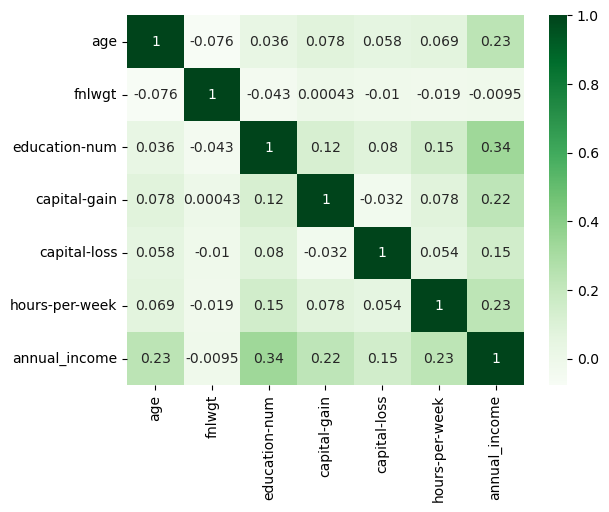

In [30]:
# CORRELATION BETWEEN NUMERICAL FEATURES

sns.heatmap(df2.corr(), cmap = 'Greens', annot = True, )
plt.show()

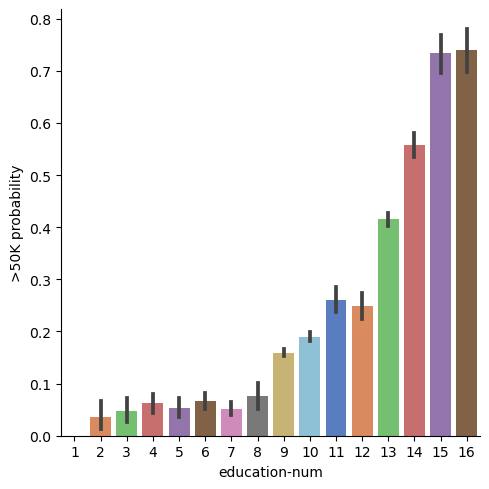

In [31]:
# INFERENCE:

# # Number of years of education has a bit more correlation than others to the annual income
# # Looking at how it affects the income

# Explore Education Num vs Income
g = sns.catplot(x="education-num",y="annual_income",data=df2,kind="bar",palette = "muted")
# g.despine(left=True)
g = g.set_ylabels(">50K probability")

In [32]:
# Most of the >50K paid people had 9-14 years of education

df2["education-num"].value_counts(sort = True, ascending = False)

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [33]:
df2.groupby('education-num')['annual_income'].count()

education-num
1        50
2       166
3       332
4       645
5       514
6       933
7      1175
8       433
9     10494
10     7282
11     1382
12     1067
13     5353
14     1722
15      576
16      413
Name: annual_income, dtype: int64

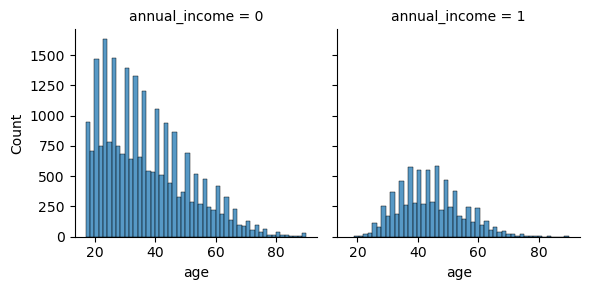

In [34]:
# Explore Age vs Income
g = sns.FacetGrid(df2, col='annual_income')
g = g.map(sns.histplot, "age")
plt.show()


# Income of more than 50K are mostly in the age of 30-60 peaking at 35-50
# Income of less than 50K is highest in the age of 20-30 and reduces significantly as age progresses

In [35]:
# Age group and Income distribution

def age_group(x):
    x = int(x)
    
    if(18<x<31):
        return "19-30"
    if(32<x<41):
        return "31-40"
    if(42<x<51):
        return "41-50"
    if(52<x<61):
        return "51-60"
    if(62<x<71):
        return "61-70"
    else:
        return"Greater than 70"
    
df2["age_group"]= df2['age'].apply(age_group)

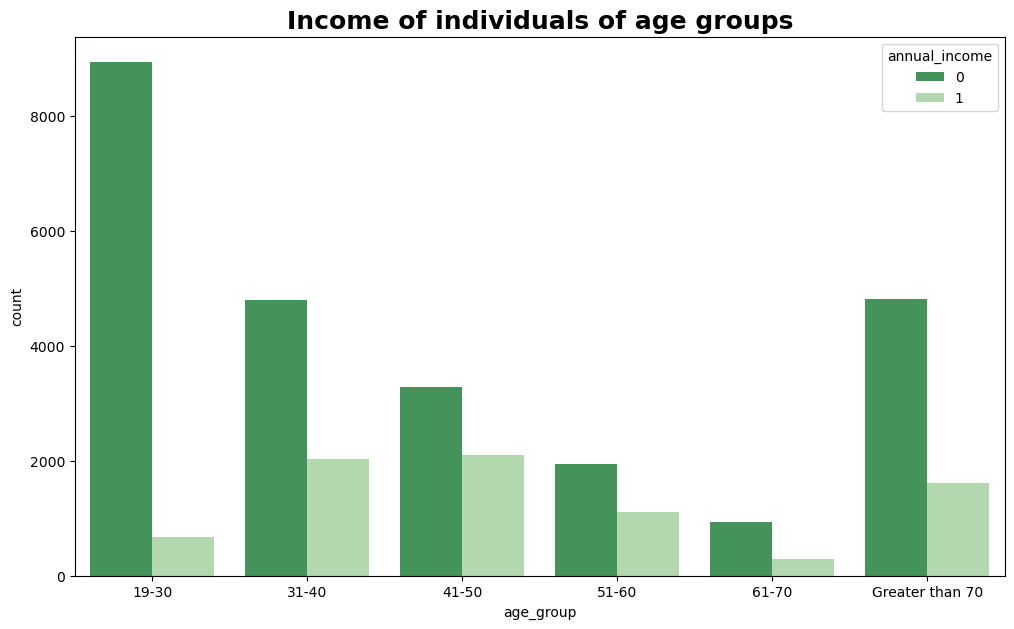

In [36]:
plt.figure(figsize = (12,7))
order_list = ["19-30","31-40","41-50","51-60","61-70","Greater than 70"]
sns.countplot(x = df2['age_group'], hue = df2["annual_income"], palette = 'Greens_r', order = order_list)
plt.title("Income of individuals of age groups", fontsize = 18, fontweight = 'bold')
plt.show()



In [37]:
# Most of the individuals with income less than 50K are in the age of 19-30
# While the more than 50K income earners are in the category of 31-60 with highest at 30-50 and over 70

# CATEGORICAL FEATURES

In [38]:
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'annual_income']

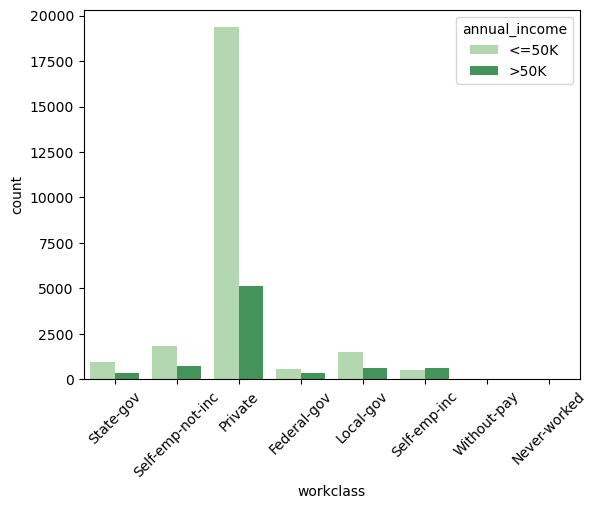

In [39]:
# Plotting workclass and annual income

sns.countplot(x = df['workclass'], hue = df['annual_income'], palette = 'Greens')
plt.xticks(rotation = 45)
plt.show()

# INFERENCE

# 1. Most of them are employed in private sector and  more than 75% earn less than 50K in private sector
# 2. Only in self employed category the number of people earning over 50K are higher than the number 
# earning less than 50K
# 3. Local gov and self employed not incorporated also have reasonable income of less than 50K 
# 4. Without pay and never worked dont fall under any category at all

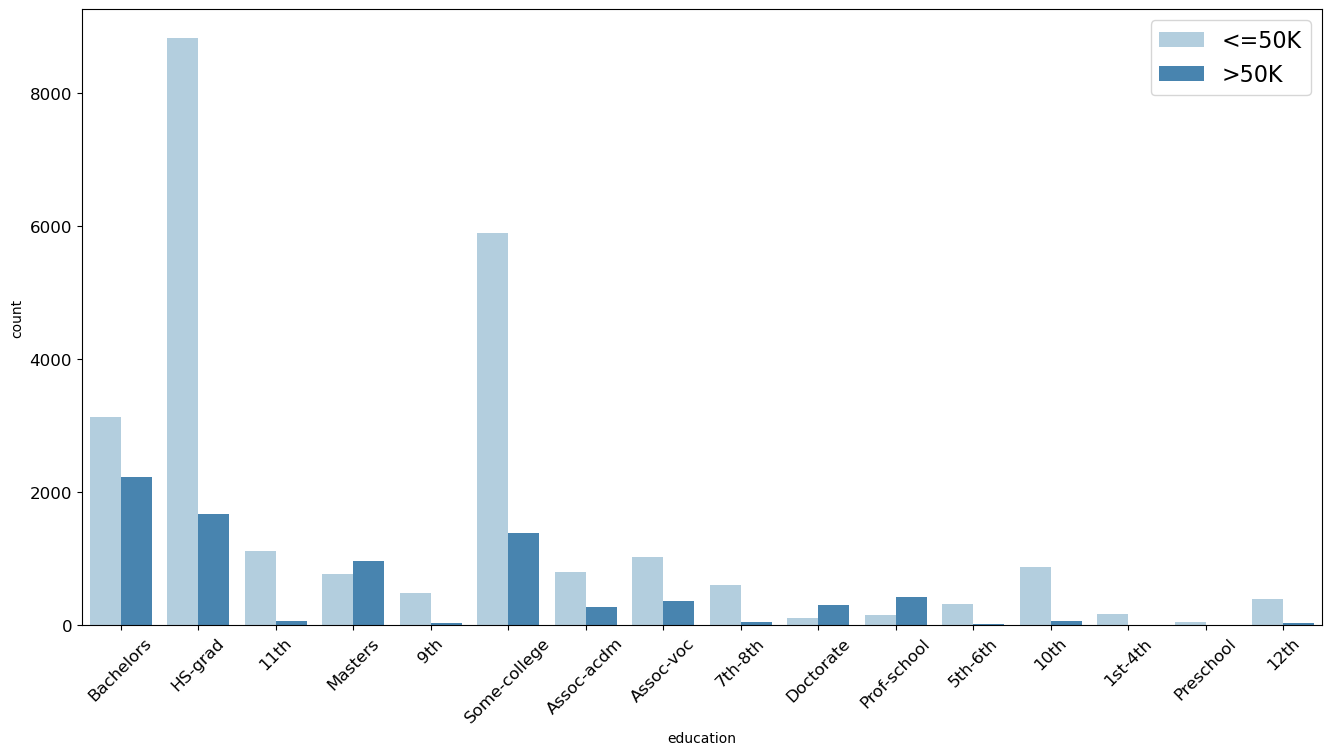

In [40]:
# Plotting education and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['education'], hue = df['annual_income'], palette = 'Blues')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


# # INFERENCE

# 1. Most of the less than 50K earners are high school graduates and some college graduates
# 2.Those who diud bachelors have somewhat almost equal number of less than 50k and more than 50K earners
# 3.Those who did masters, docotral and professional school have more than 50K earns than less 
# 4. Anyone who did until 12th have predominantly less than 50K earning

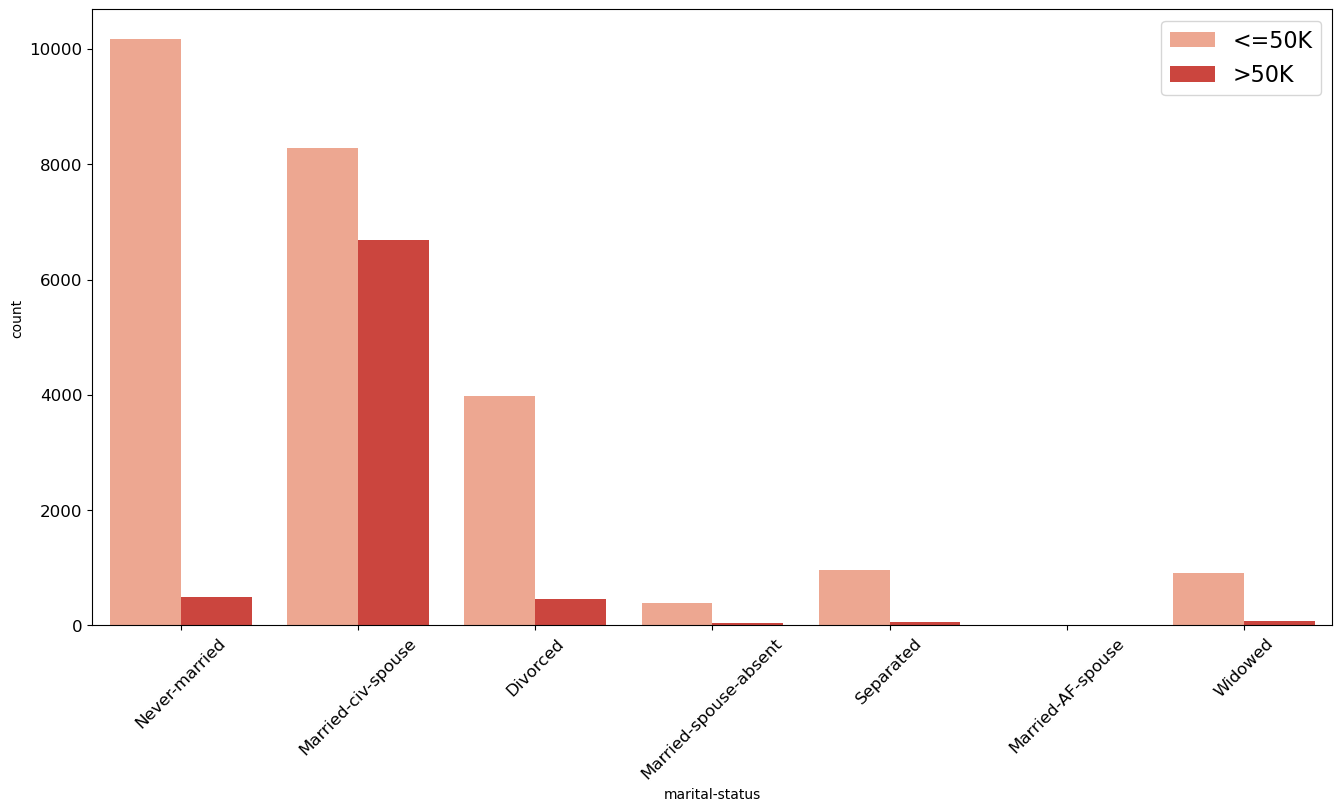

In [41]:
# Plotting marital status and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['marital-status'], hue = df['annual_income'], palette = 'Reds')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


# # INFERENCE

# 1. Only in the married-civ-spouse category has similar number of both earner categories
# 2. Everything else has only earners of less than 50K 

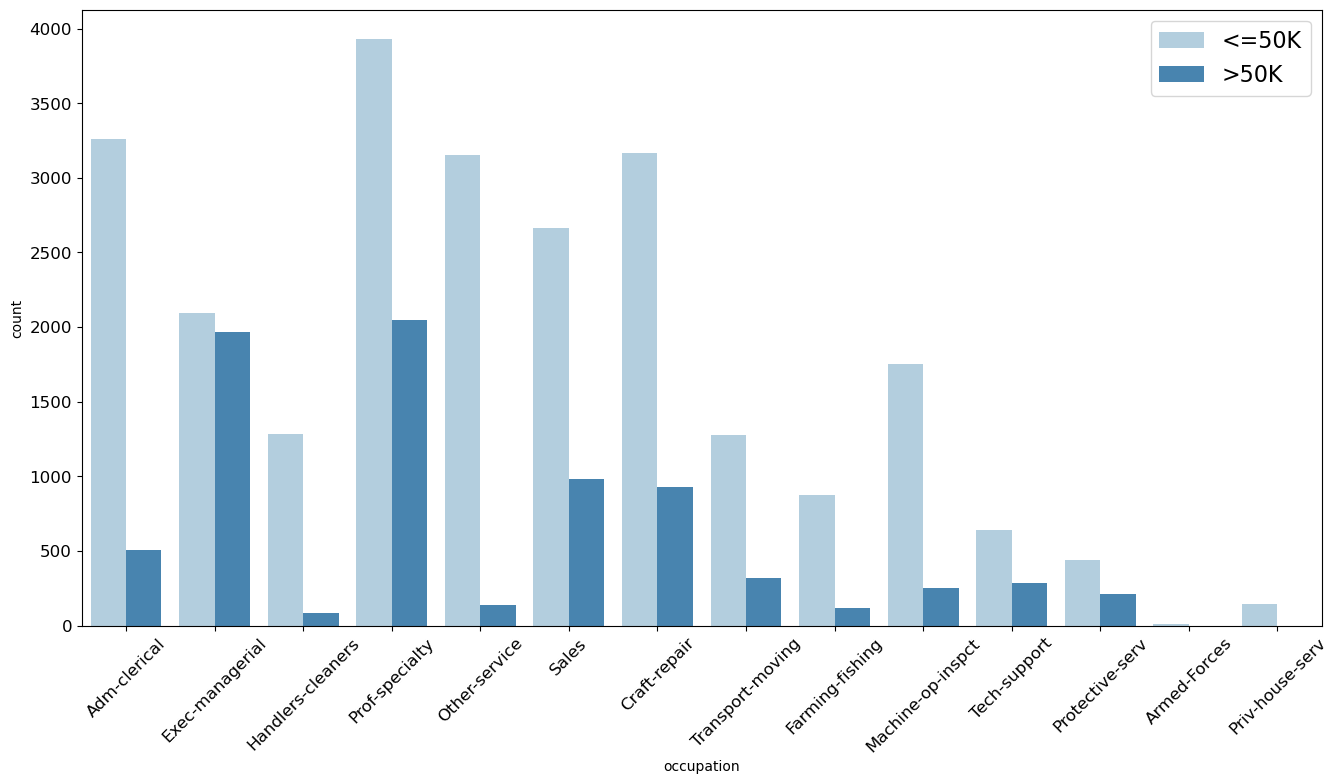

In [42]:
# Plotting occupation and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['occupation'], hue = df['annual_income'], palette = 'Blues')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


# # INFERENCE
# 1. Mangerial, sales , Prof speciality and craft repair have large number of less than 50K earners
# 2. Managerial sales is the only category where equal income distribution has happened
# 3.Cleaner, other services, priv house servants, farming -fishing have negligeble numbers of more than 50K earners



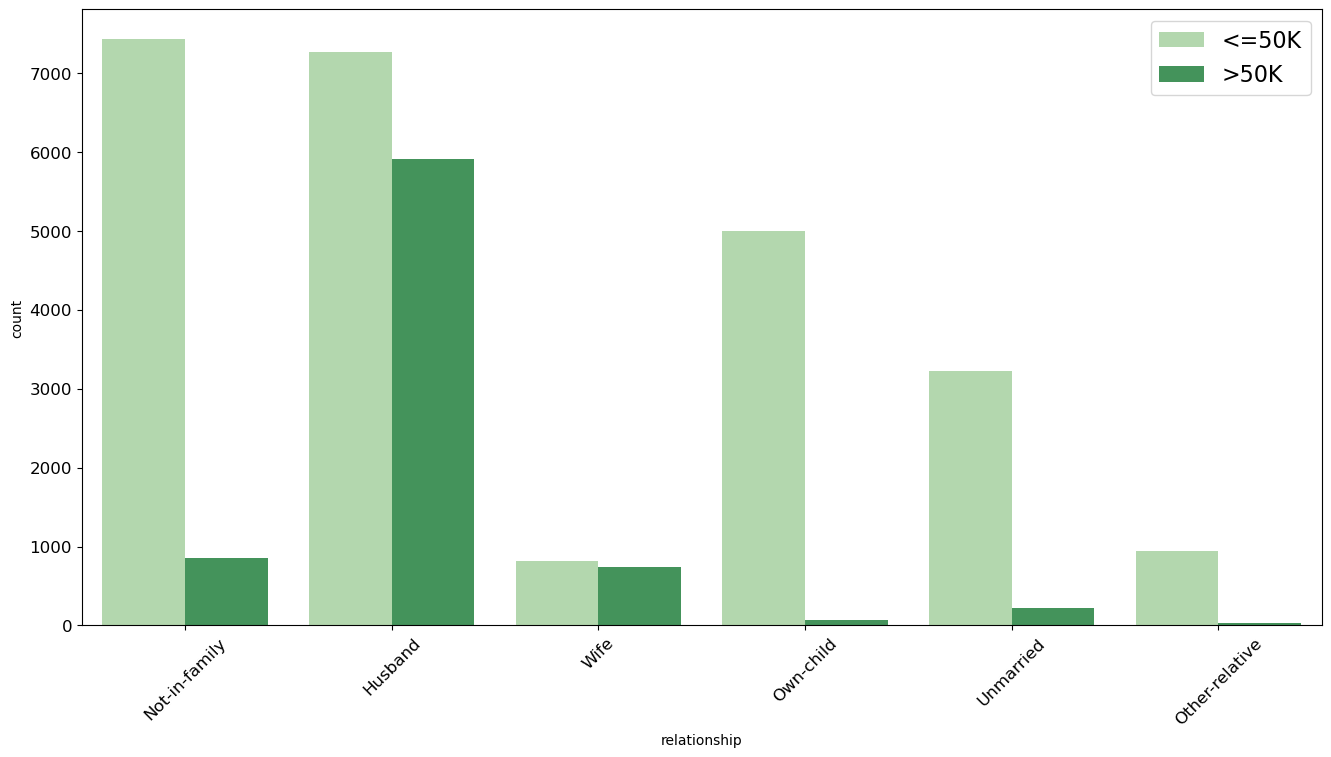

In [43]:
# Plotting occupation and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['relationship'], hue = df['annual_income'], palette = 'Greens')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


# # INFERENCE

# 1. Wives have equal earners in both categories
# 2. Husbands also have high earners but a bit lesser than 50K
# 3. Unmarried people and not in family have very less earners in over 50K category
# 4. Those with own child have less than 50K while negligeble numbers in over 50K category


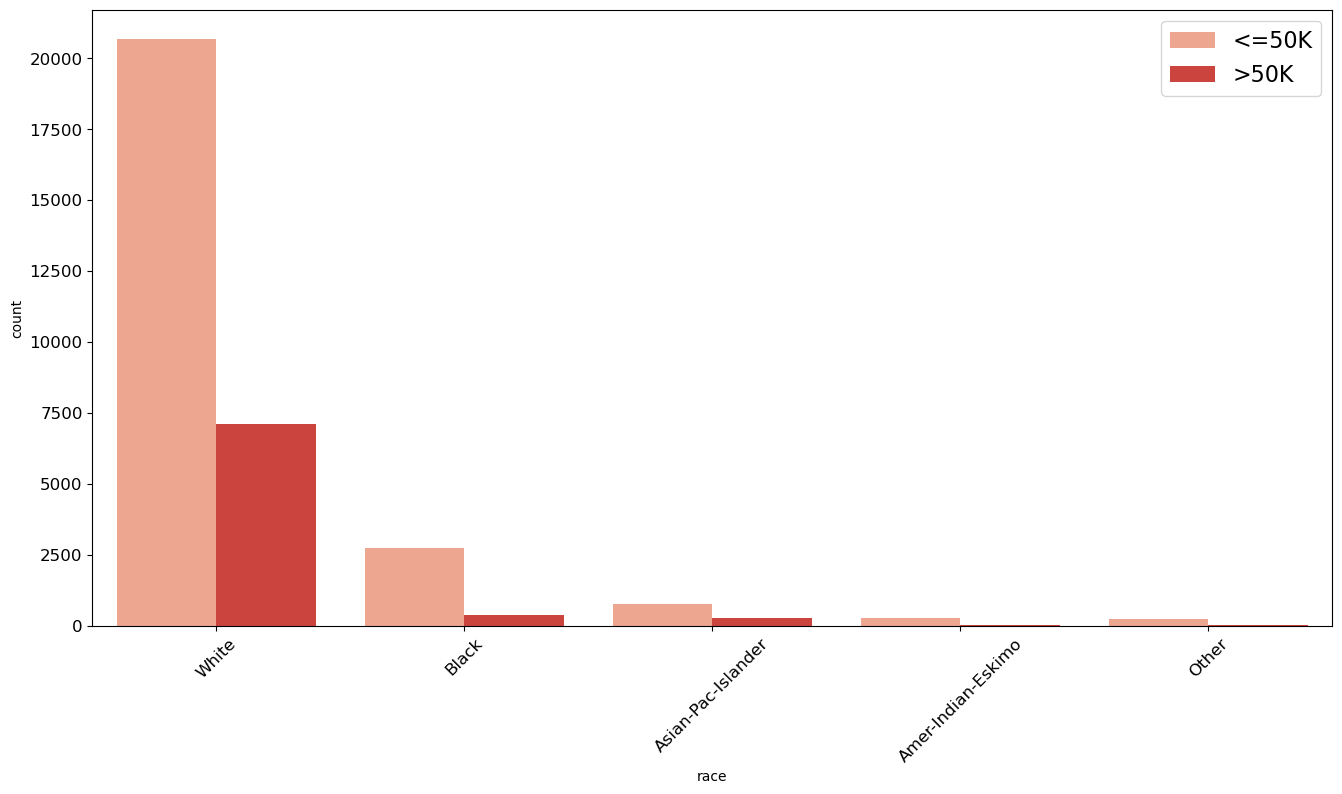

In [44]:
# Plotting occupation and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['race'], hue = df['annual_income'], palette = 'Reds')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


# INFERENCE:
    
#     1.70% of the population belongs to white race and extremely negligent amount in others
#     2.onoy 25% of the white get paid over 50K whilst in other races its far less significant

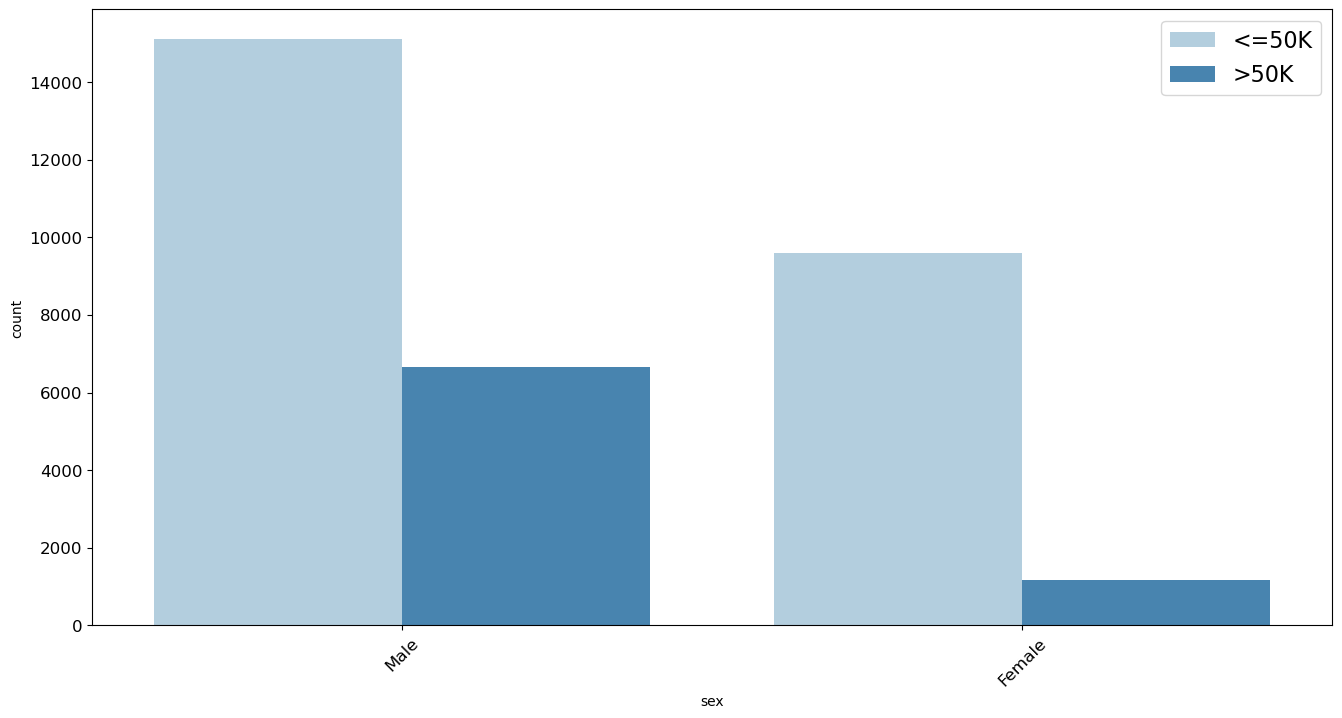

In [45]:
# Plotting occupation and annual income
plt.figure(figsize = (16,8))
sns.countplot(x = df['sex'], hue = df['annual_income'], palette = 'Blues')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# # INFERENCE

# 1. There are higher more than 50K earners in male than females 
# 2. 30 % of males earn over 50K
# 3. Less than 10% females earn over 50K


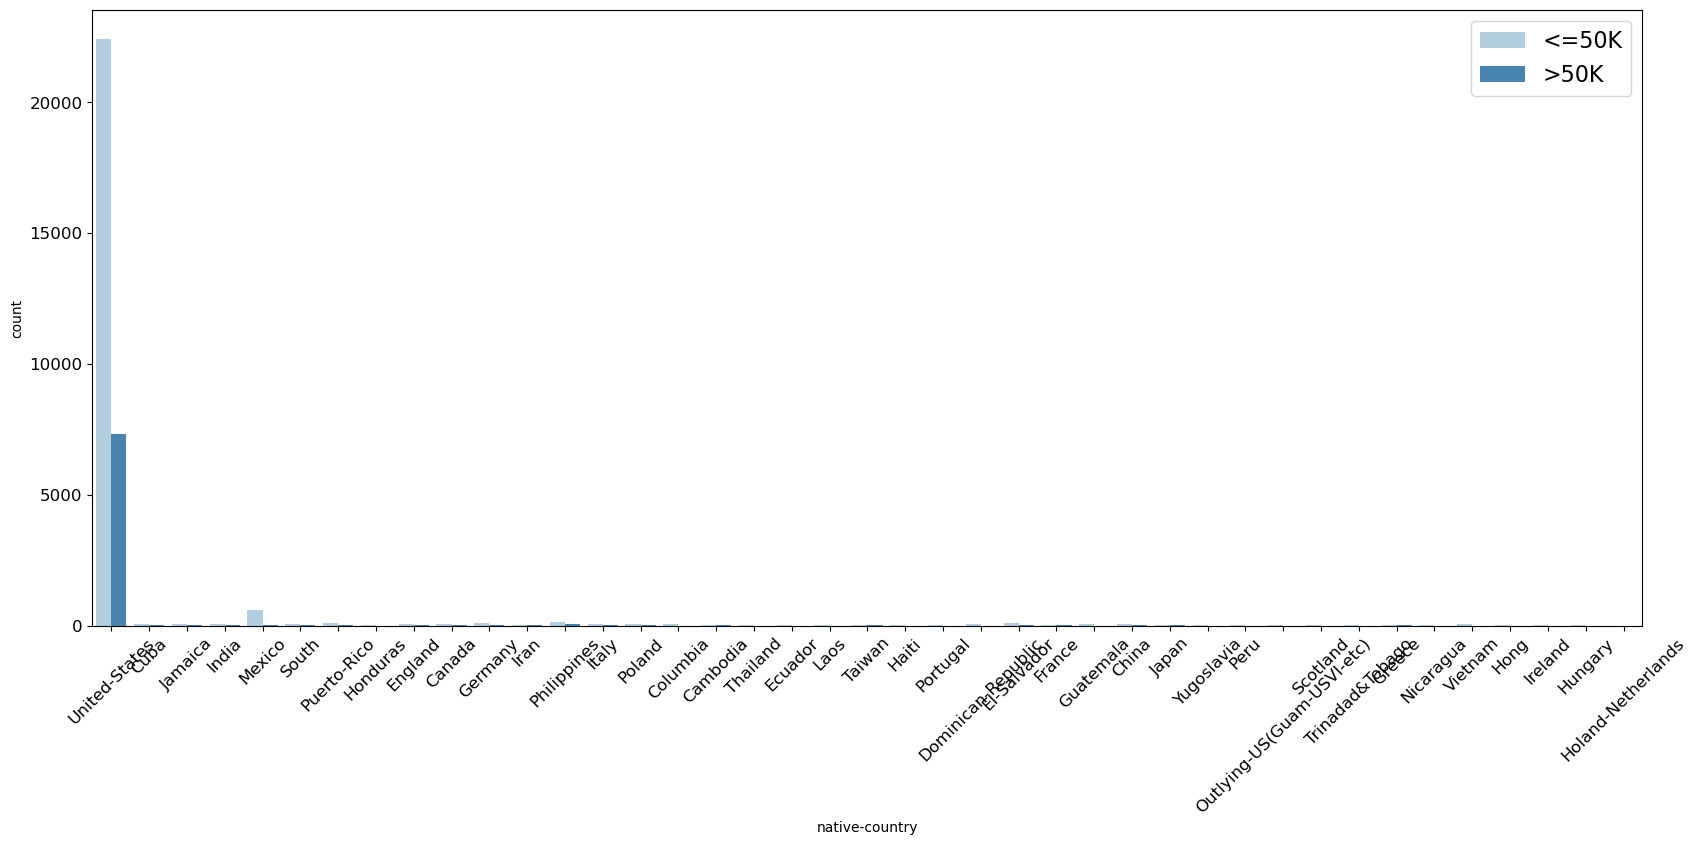

In [46]:
# Plotting occupation and annual income
plt.figure(figsize = (20,8))
sns.countplot(x = df['native-country'], hue = df['annual_income'], palette = 'Blues')
plt.xticks(rotation = 45)
plt.legend(fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# INFERENCE

# 1. Most of the data seems to be from united states.
# 2. Negligeble data from other countries 

In [47]:
# # OUTLIER DECISION

# There are plenty of outliers and if they are removed 50% of the data is lost

# I have decided not to remove any outliers

In [48]:
# Checking the unique values in capital loss and capital gain columns

df['capital-loss'].value_counts()

# 90% of the data has value 0, i have decided to drop the column as well as its not adding any value to the data

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [49]:

df['capital-gain'].value_counts()

# 85% of the data has value 0, i have decided to drop the column as well as its not adding any value to the data

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [50]:
# DROPPING THE TWO COLUMNS

df.drop(['capital-loss', 'capital-gain'], axis = 1, inplace = True)

In [51]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# ENCODING DATA

In [52]:
# Encoding all the categorical features

cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'annual_income']

In [53]:
# Importing Label Encoder

from sklearn.preprocessing import LabelEncoder


In [54]:
le = LabelEncoder()

In [55]:
categorical = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']

for col in categorical:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [56]:
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,annual_income
0,39,6,77516,9,13,4,0,1,4,1,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,40,4,<=50K


In [57]:
# CHECKING FOR MULTICOLLINEARITY

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Assigning X and y variables

X = df.iloc[:,:-1] #All columns except the target variable


In [60]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,40,38
1,50,5,83311,9,13,2,3,0,4,1,13,38
2,38,3,215646,11,9,0,5,1,4,1,40,38
3,53,3,234721,1,7,2,5,0,2,1,40,38
4,28,3,338409,9,13,2,9,5,2,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,40,38
32558,58,3,151910,11,9,6,0,4,4,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,20,38


In [61]:
# Target variable (Annual Income )

y = df.iloc[:, -1]

In [62]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: annual_income, Length: 32537, dtype: object

In [63]:
# GENERATING THE VIF FOR ALL THE COLUMNS

vif = pd.DataFrame()
vif['Columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif


# Removing the columns one by one with the highest VIF indicating high mulitcolinearity

,Columns,VIF
0,age,8.831839
1,workclass,8.430390
2,fnlwgt,4.041228
3,education,9.225118
4,education-num,18.487404
5,marital-status,4.074711
6,occupation,3.385768
7,relationship,2.669907
8,race,17.891689
9,sex,4.498869


In [64]:
X.drop(['native-country'], axis =1, inplace = True)

In [65]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week
0,39,6,77516,9,13,4,0,1,4,1,40
1,50,5,83311,9,13,2,3,0,4,1,13
2,38,3,215646,11,9,0,5,1,4,1,40
3,53,3,234721,1,7,2,5,0,2,1,40
4,28,3,338409,9,13,2,9,5,2,0,40


In [66]:
vif = pd.DataFrame()
vif['Columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Columns,VIF
0,age,8.372267
1,workclass,8.299314
2,fnlwgt,4.018980
3,education,9.084041
4,education-num,17.644308
5,marital-status,3.947687
6,occupation,3.369935
7,relationship,2.539896
8,race,15.696276
9,sex,4.426741


In [67]:
X.drop(['education-num'], axis =1, inplace = True)

In [68]:
vif = pd.DataFrame()
vif['Columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Columns,VIF
0,age,8.143651
1,workclass,8.247475
2,fnlwgt,4.009030
3,education,7.359653
4,marital-status,3.912860
5,occupation,3.296378
6,relationship,2.530851
7,race,15.123394
8,sex,4.424527
9,hours-per-week,10.894861


In [69]:
X.drop(['race'], axis =1, inplace = True)

In [70]:
vif = pd.DataFrame()
vif['Columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Columns,VIF
0,age,7.499685
1,workclass,7.894958
2,fnlwgt,3.949205
3,education,7.064418
4,marital-status,3.805420
5,occupation,3.265895
6,relationship,2.465095
7,sex,4.299760
8,hours-per-week,10.202086


In [71]:
X.drop(['hours-per-week'], axis =1, inplace = True)

In [72]:
vif = pd.DataFrame()
vif['Columns']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Columns,VIF
0,age,6.859249
1,workclass,7.541092
2,fnlwgt,3.883670
3,education,6.550903
4,marital-status,3.798502
5,occupation,3.240344
6,relationship,2.445616
7,sex,3.957112


In [73]:
# All the VIF values are now below 8, the rest of the features can be retained

# FEATURE SCALING

## The values in the dataset are all of various scales and to standardise, scaling is done with Standard scaler

In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [75]:
# Standardising the values

X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [76]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex
0,0.030390,2.623449,-1.063569,-0.335266,0.921857,-1.545209,-0.277864,0.703020
1,0.836973,1.720541,-1.008668,-0.335266,-0.405919,-0.790133,-0.900126,0.703020
2,-0.042936,-0.085276,0.245040,0.181519,-1.733696,-0.286749,-0.277864,0.703020
3,1.056950,-0.085276,0.425752,-2.402406,-0.405919,-0.286749,-0.900126,0.703020
4,-0.776193,-0.085276,1.408066,-0.335266,-0.405919,0.720018,2.211186,-1.422436
...,...,...,...,...,...,...,...,...
32532,-0.849519,-0.085276,0.639678,-0.852051,-0.405919,1.475094,2.211186,-1.422436
32533,0.103716,-0.085276,-0.335436,0.181519,-0.405919,-0.035058,-0.900126,0.703020
32534,1.423579,-0.085276,-0.358779,0.181519,2.249634,-1.545209,1.588923,-1.422436
32535,-1.216148,-0.085276,0.110930,0.181519,0.921857,-1.545209,0.966661,0.703020


In [77]:
# SPLITTING THE DATA

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [78]:
# Checking for the rows in Train and test

X_train

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex
20792,0.323693,0.817632,0.522611,-0.335266,-0.405919,0.720018,-0.900126,0.703020
14889,0.836973,-0.085276,-0.569447,-0.335266,-1.733696,-0.790133,-0.277864,-1.422436
21098,-0.409565,-0.085276,-0.128804,-2.144013,-1.733696,-1.041825,-0.277864,0.703020
21534,-1.582777,-0.085276,0.485436,-2.144013,0.921857,0.720018,0.966661,-1.422436
745,0.250367,-1.891093,-0.601222,-0.335266,-0.405919,0.720018,2.211186,-1.422436
...,...,...,...,...,...,...,...,...
32511,-1.216148,-0.085276,1.281345,-2.144013,0.921857,0.971710,0.966661,0.703020
5192,-0.042936,-0.085276,0.340355,0.181519,-0.405919,-0.035058,-0.900126,0.703020
12172,-0.629542,-0.085276,-0.208336,0.181519,0.921857,-1.545209,0.966661,-1.422436
235,1.496905,2.623449,0.747660,0.181519,-0.405919,0.216634,-0.900126,0.703020


In [79]:
X_test

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,sex
12576,1.936859,-0.085276,-0.187285,-0.335266,-0.405919,-1.545209,-0.900126,0.703020
11846,0.250367,2.623449,1.438656,-0.335266,-0.405919,0.720018,-0.900126,0.703020
9399,-0.996171,-0.085276,2.809451,0.181519,-1.733696,0.216634,-0.277864,0.703020
32130,1.936859,-0.085276,-0.143791,-1.627228,2.249634,-0.035058,-0.277864,-1.422436
19716,-0.042936,1.720541,-0.414371,-0.335266,-0.405919,0.720018,-0.900126,0.703020
...,...,...,...,...,...,...,...,...
20759,-0.776193,-0.085276,1.787499,-0.335266,0.921857,-1.545209,-0.277864,0.703020
1321,-1.362799,-0.085276,-0.709649,1.215089,0.921857,-1.545209,0.966661,0.703020
3529,0.616996,-0.085276,-0.705063,0.181519,-1.733696,-0.035058,-0.277864,-1.422436
20786,0.616996,2.623449,0.092190,-0.335266,-0.405919,-0.790133,-0.900126,0.703020


In [80]:
y_train

20801    <=50K
14894     >50K
21107    <=50K
21545    <=50K
745       >50K
         ...  
32535    <=50K
5194      >50K
12176    <=50K
235      <=50K
29754    <=50K
Name: annual_income, Length: 22775, dtype: object

In [81]:
y_test

12580    <=50K
11850     >50K
9402     <=50K
32153    <=50K
19725     >50K
         ...  
20768     >50K
1321     <=50K
3529     <=50K
20795     >50K
7671      >50K
Name: annual_income, Length: 9762, dtype: object

# BUILDING MODELS

# LOGISTIC REGRESSION MODEL

In [82]:

from sklearn.linear_model import LogisticRegression

lo_model = LogisticRegression()

In [83]:
lo_model.fit(X_train,y_train)

LogisticRegression()

In [84]:
lo_pred = lo_model.predict(X_test)

In [85]:
from sklearn.metrics import *

In [86]:
accuracy_score(y_test, lo_pred)

0.7488219627125589

In [87]:
confusion_matrix(y_test, lo_pred)

array([[7059,  415],
       [2037,  251]])

In [88]:
BASIC LOGISTIC REGRESSION MODEL : ACCURACY SCORE : 74.8%

SyntaxError: invalid syntax (2409136869.py, line 1)

# BUILDING LOGISTIC REGRESSION MODEL WITHOUT VIF

In [ ]:

X1 = df.iloc[:,:-1]
y1 = df.iloc[:,-1]

In [ ]:
X1, y1

# FEATURE SCALING

In [ ]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Standardising the values

X1 = pd.DataFrame(sc.fit_transform(X1), columns = X1.columns)

In [ ]:
X1

In [ ]:
# SPLITTING THE DATA

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 1)

In [ ]:
# BULIDING LOGISTIC REGRESSION MODEL

In [ ]:
lo_model1 = LogisticRegression()

In [ ]:
lo_model1.fit(X1_train,y1_train)

In [ ]:
lo_pred1 = lo_model1.predict(X1_test)

In [ ]:
accuracy_score(y1_test, lo_pred1)

In [ ]:
confusion_matrix(y1_test, lo_pred1)

# INFERENCE

In [ ]:
# The model is performing better when the features arent selected but using the whole dataframe and not removing any outliers
# Will be further testing the with other classification models

# DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X1_train, y1_train)

In [ ]:
dt_pred = dt_model.predict(X1_test)

In [ ]:
accuracy_score(y1_test, dt_pred)

In [ ]:
confusion_matrix(y1_test, dt_pred)

# INFERENCE

In [ ]:
# Decision tree model performance is lower than logistic regression

# RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X1_train, y1_train)

In [ ]:
rf_pred = rf_model.predict(X1_test)

In [ ]:
accuracy_score(y1_test, rf_pred)

In [ ]:
confusion_matrix(y1_test, rf_pred)

# INFERENCE

In [ ]:
# 1. Amongst the three models, random forest classifier seems to be the best performing model 
# 2. It gives an accuracy score of 82.7% while logistic regression had an accuracy score of 80.7% and 
# decision tree had a score of 77.5%
# 3. These models seem to be performing better than the basic logistic regression model after getting rid of multicollinearity
# 4. Recommended to not perform the multicollinearity or the outlier removal 

In [ ]:
# RUNNING PYCARET ON GOOGLE COLLAB TO CHECK FOR THE BEST MODEL 

In [ ]:
# the results came out to be XGboost for this classification

# Running the basic XGboost model increased the accuracy from 

In [ ]:
import xgboost as xgb

In [ ]:
# Using XGBOOST as the best model for the classification problem

In [ ]:
# Creating a copy of the dataframe

df3 = df.copy()

In [ ]:
df3

In [ ]:
# Mapping the target categories into numerical values for the XGBoost algorithm to use 


df3['annual_income']=df3['annual_income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
# Splicing the dataframe in X and y variables

X3 = df3.iloc[:,:-1]
y3 = df3.iloc[:,-1]

In [ ]:
# SPLITTING THE DATASET INTO TRAIN TEST AND SPLIT

x3_train, x3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=65)

In [ ]:
# Optimising th learning rate for the XGboost


# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = [] 
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(x3_train, y3_train)
    train_XG.append(xgb_classifier.score(x3_train, y3_train))
    test_XG.append(xgb_classifier.score(x3_test, y3_test))

In [ ]:
# Then, we can draw a line plot to see how XGBoost performs.

In [ ]:
# Plotting learning rate and accuracy score to determine the optimal learning rate


fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

In [ ]:
# IMPORTING XGBOOST CLASSIFIER AND USING THE OPTIMAL LEARNING RATE

from xgboost import XGBClassifier

xg_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate = 0.06)


# LABEL ENCODER IS FALSE AS THE FEATURES ARE ALREADY ENCODED

In [ ]:
# TRAINING THE MODEL

xg_model.fit(x3_train, y3_train)

In [ ]:
# TESTING THE MODEL

xg_pred = xg_model.predict(x3_test)

In [ ]:
xg_pred

In [ ]:
# CHECKING FOR ACCURACY OF THE MODEL

accuracy = accuracy_score(y3_test, xg_pred)
accuracy